In [2]:
!pip install mglearn

     |████████████████████████████████| 542kB 14.0MB/s 
  Created wheel for mglearn: filename=mglearn-0.1.9-py2.py3-none-any.whl size=582638 sha256=71c27e52256efa94691598dd6fe76a007f42ccd24fc6d3f66b14745c99b919d8
  Stored in directory: /root/.cache/pip/wheels/eb/a6/ea/a6a3716233fa62fc561259b5cb1e28f79e9ff3592c0adac5f0
Successfully built mglearn


In [3]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
import mglearn #library provided by amueller
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
data_dir = '/content/drive/My Drive/Colab Notebooks/AI_HW1/'

import os
os.listdir(data_dir)

['SolarPrediction.csv',
 'KAG_energydata_complete.csv',
 'data.csv',
 'covid_sentiments.xlsx',
 'Stars.csv',
 'AI Machine Learning: Homework 1_Stars Class.ipynb',
 'AI Machine Learning: Homework 1_Spotify.ipynb']

In [6]:
def get_data():
  df_data = pd.read_csv(data_dir+'SolarPrediction.csv')
  return df_data

print(len(get_data()))
get_data()

32686


,UNIXTime,Data,Time,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet
0,1475229326,9/29/2016 12:00:00 AM,23:55:26,1.21,48,30.46,59,177.39,5.62,06:13:00,18:13:00
1,1475229023,9/29/2016 12:00:00 AM,23:50:23,1.21,48,30.46,58,176.78,3.37,06:13:00,18:13:00
2,1475228726,9/29/2016 12:00:00 AM,23:45:26,1.23,48,30.46,57,158.75,3.37,06:13:00,18:13:00
3,1475228421,9/29/2016 12:00:00 AM,23:40:21,1.21,48,30.46,60,137.71,3.37,06:13:00,18:13:00
4,1475228124,9/29/2016 12:00:00 AM,23:35:24,1.17,48,30.46,62,104.95,5.62,06:13:00,18:13:00
...,...,...,...,...,...,...,...,...,...,...,...
32681,1480587604,12/1/2016 12:00:00 AM,00:20:04,1.22,44,30.43,102,145.42,6.75,06:41:00,17:42:00
32682,1480587301,12/1/2016 12:00:00 AM,00:15:01,1.17,44,30.42,102,117.78,6.75,06:41:00,17:42:00
32683,1480587001,12/1/2016 12:00:00 AM,00:10:01,1.20,44,30.42,102,145.19,9.00,06:41:00,17:42:00
32684,1480586702,12/1/2016 12:00:00 AM,00:05:02,1.23,44,30.42,101,164.19,7.87,06:41:00,17:42:00


In [7]:
def df_filter():
  df = get_data()
  df_filter = df.drop(['UNIXTime', 'Data', 'Time', 'TimeSunRise', 'TimeSunSet' ], axis=1)
  return df_filter

df_filter()

,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed
0,1.21,48,30.46,59,177.39,5.62
1,1.21,48,30.46,58,176.78,3.37
2,1.23,48,30.46,57,158.75,3.37
3,1.21,48,30.46,60,137.71,3.37
4,1.17,48,30.46,62,104.95,5.62
...,...,...,...,...,...,...
32681,1.22,44,30.43,102,145.42,6.75
32682,1.17,44,30.42,102,117.78,6.75
32683,1.20,44,30.42,102,145.19,9.00
32684,1.23,44,30.42,101,164.19,7.87


In [8]:
df_filter().shape

(32686, 6)

In [9]:
df_filter().loc[1:2000, :]

,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed
1,1.21,48,30.46,58,176.78,3.37
2,1.23,48,30.46,57,158.75,3.37
3,1.21,48,30.46,60,137.71,3.37
4,1.17,48,30.46,62,104.95,5.62
5,1.21,48,30.46,64,120.20,5.62
...,...,...,...,...,...,...
1996,1.25,54,30.46,83,167.92,6.75
1997,1.28,54,30.46,83,140.74,7.87
1998,1.26,54,30.46,84,188.98,9.00
1999,1.28,54,30.46,85,151.95,2.25


In [10]:
from collections import Counter

def calculate_pcc():
  df = get_data()
  state_counts = Counter(df['Radiation'])
  df_state = pd.DataFrame.from_dict(state_counts, orient='index')
  #df_state.plot(kind='bar')

  num=(df_state[0]/df_state[0].sum())**2

  print("Population per class:{}".format(df_state))

  print("Proportion Chance Criterion: {:0.2f}%".format(100*num.sum()))
  print("1.25 * Proportion Chance Criterion: {:0.2f}%".format(1.25*100*num.sum()))

calculate_pcc()

Population per class:          0
1.21   2010
1.23   2110
1.17    210
1.20   1558
1.24   1725
...     ...
16.32     1
9.03      1
7.04      1
4.45      1
4.29      1

[14434 rows x 1 columns]
Proportion Chance Criterion: 2.12%
1.25 * Proportion Chance Criterion: 2.65%


In [11]:
def split_df():
  df = df_filter()

  X = df.drop('Radiation', axis = 1)
  y = df['Radiation']

  return X, y

split_df()

(       Temperature  Pressure  Humidity  WindDirection(Degrees)  Speed
 0               48     30.46        59                  177.39   5.62
 1               48     30.46        58                  176.78   3.37
 2               48     30.46        57                  158.75   3.37
 3               48     30.46        60                  137.71   3.37
 4               48     30.46        62                  104.95   5.62
 ...            ...       ...       ...                     ...    ...
 32681           44     30.43       102                  145.42   6.75
 32682           44     30.42       102                  117.78   6.75
 32683           44     30.42       102                  145.19   9.00
 32684           44     30.42       101                  164.19   7.87
 32685           44     30.43       101                   83.59   3.37
 
 [32686 rows x 5 columns], 0        1.21
 1        1.21
 2        1.23
 3        1.21
 4        1.17
          ... 
 32681    1.22
 32682    1.17


In [14]:
from sklearn.model_selection import train_test_split

df = df_filter().loc[1:100, :]
all_training = df
all_test = df

for seedN in range(1,6):
    X_train, X_test, y_train, y_test = train_test_split(df.drop('Radiation', axis = 1), df['Radiation'], test_size=0.25, random_state=seedN)
    training_accuracy = []  
    test_accuracy = []
    neighbors_settings = range(1, 101) # try n_neighbors from 1 to 10

    for n_neighbors in neighbors_settings:   
        reg = KNeighborsRegressor(n_neighbors=75) # build the model 
        reg.fit(X_train, y_train) #clf = KNeighborsClassifier(n_neighbors=n_neighbors    
        training_accuracy.append(reg.score(X_train, y_train)) # record training set accuracy  
        test_accuracy.append(reg.score(X_test, y_test)) # record generalization accuracy    
    all_training[seedN]=training_accuracy
    all_test[seedN] = test_accuracy

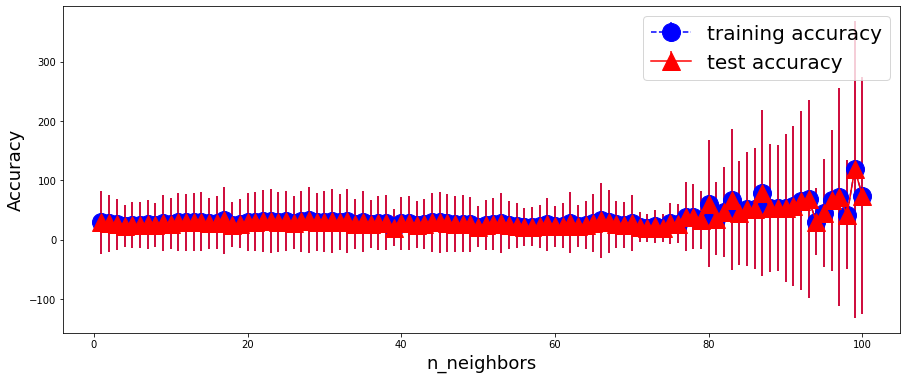

In [15]:
fig = plt.figure(figsize=(15, 6))
import pylab as plot
params = {'legend.fontsize': 20, 'legend.handlelength': 2}
plot.rcParams.update(params)

plt.errorbar(neighbors_settings, all_training.mean(axis=1),
             yerr=all_training.std(axis=1), label="training accuracy", color='blue', marker='o', linestyle='dashed', markersize=18)
plt.errorbar(neighbors_settings, all_test.mean(axis=1),
             yerr=all_test.std(axis=1), label="test accuracy", color='red', marker='^', linestyle='-', markersize=18)
plt.ylabel("Accuracy", fontsize=18)
plt.xlabel("n_neighbors",fontsize=18)
plt.legend()

-0.14317055736634732


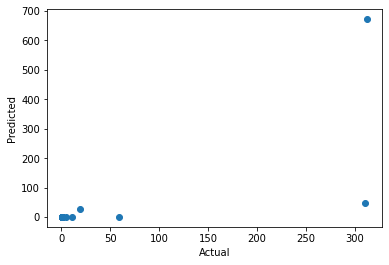

In [16]:
from sklearn.metrics import r2_score

reg = KNeighborsRegressor(n_neighbors=1)
X_train, X_test, y_train, y_test = train_test_split(df.drop('Radiation', axis = 1), df['Radiation'], test_size=0.25, random_state=seedN)
reg.fit(X_train, y_train)

plt.plot( y_test, reg.predict(X_test), 'o')

plt.xlabel("Actual")
plt.ylabel("Predicted")

print(r2_score(y_test, reg.predict(X_test)))

In [17]:
all_test.mean (axis=1)

1       28.808404
2       27.080222
3       25.438404
4       22.842950
5       24.414768
          ...    
96      66.187495
97      71.714768
98      42.191132
99     118.192950
100     74.248404
Length: 100, dtype: float64